In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
for dirname, _, filenames in os.walk('C:/Users/JOSUA ATMAJA/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/JOSUA ATMAJA/input\indonesian_vaccination_tweets.csv


In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 3.0, w_pad = 3.0, h_pad = 3.0)
    plt.show()

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=100, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=120)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 20: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 
df1 = pd.read_csv('C:/Users/JOSUA ATMAJA/input/indonesian_vaccination_tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'indonesian_vaccination_tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 17 columns


In [7]:
df1.head(5)

,id,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,reply_to_status
0,1348286903527768065,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,NaN
1,1348302168248340481,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,NaN
2,1348307055040348160,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,NaN
3,1348322660925669377,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,NaN
4,1348425614584266753,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,NaN


<ipython-input-3-c929f2ac57e8>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-3-c929f2ac57e8>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-3-c929f2ac57e8>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


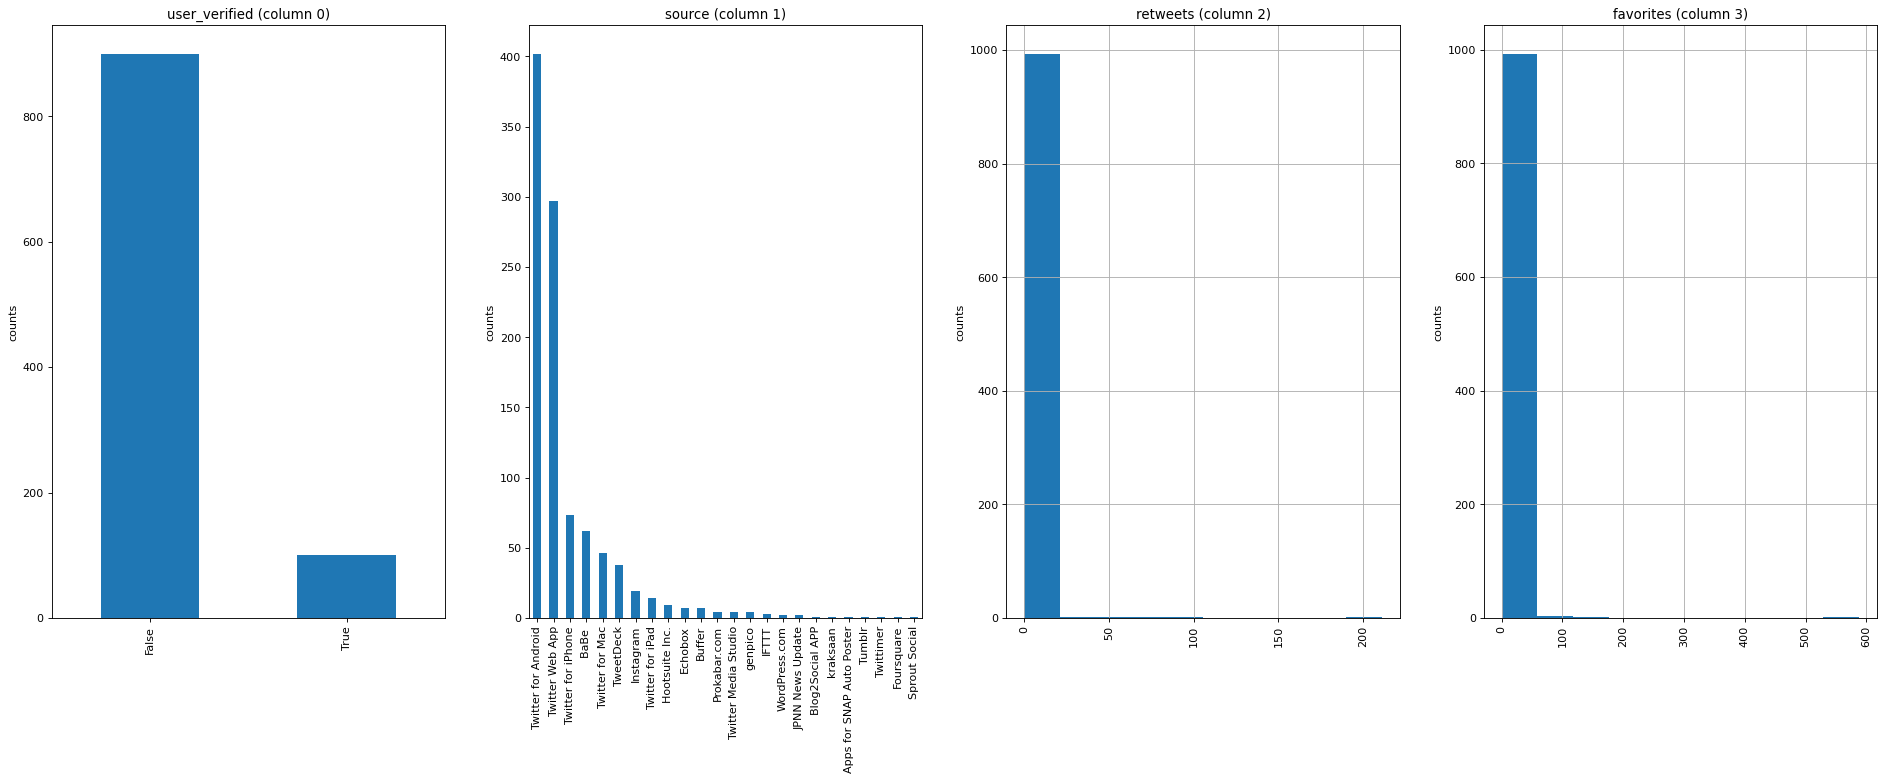

In [8]:
plotPerColumnDistribution(df1, 20, 10)

<ipython-input-13-deac70d7da1e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


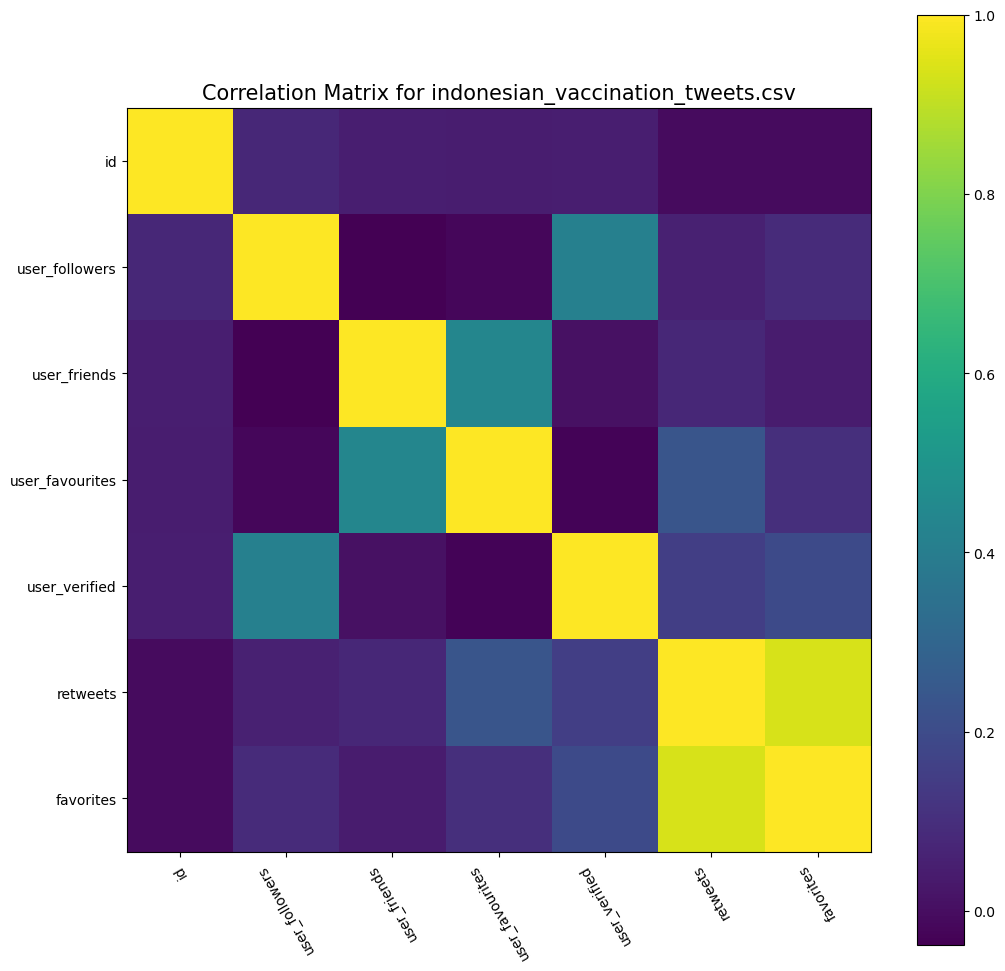

In [14]:
plotCorrelationMatrix(df1, 12)

<ipython-input-5-588d07b1e99a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


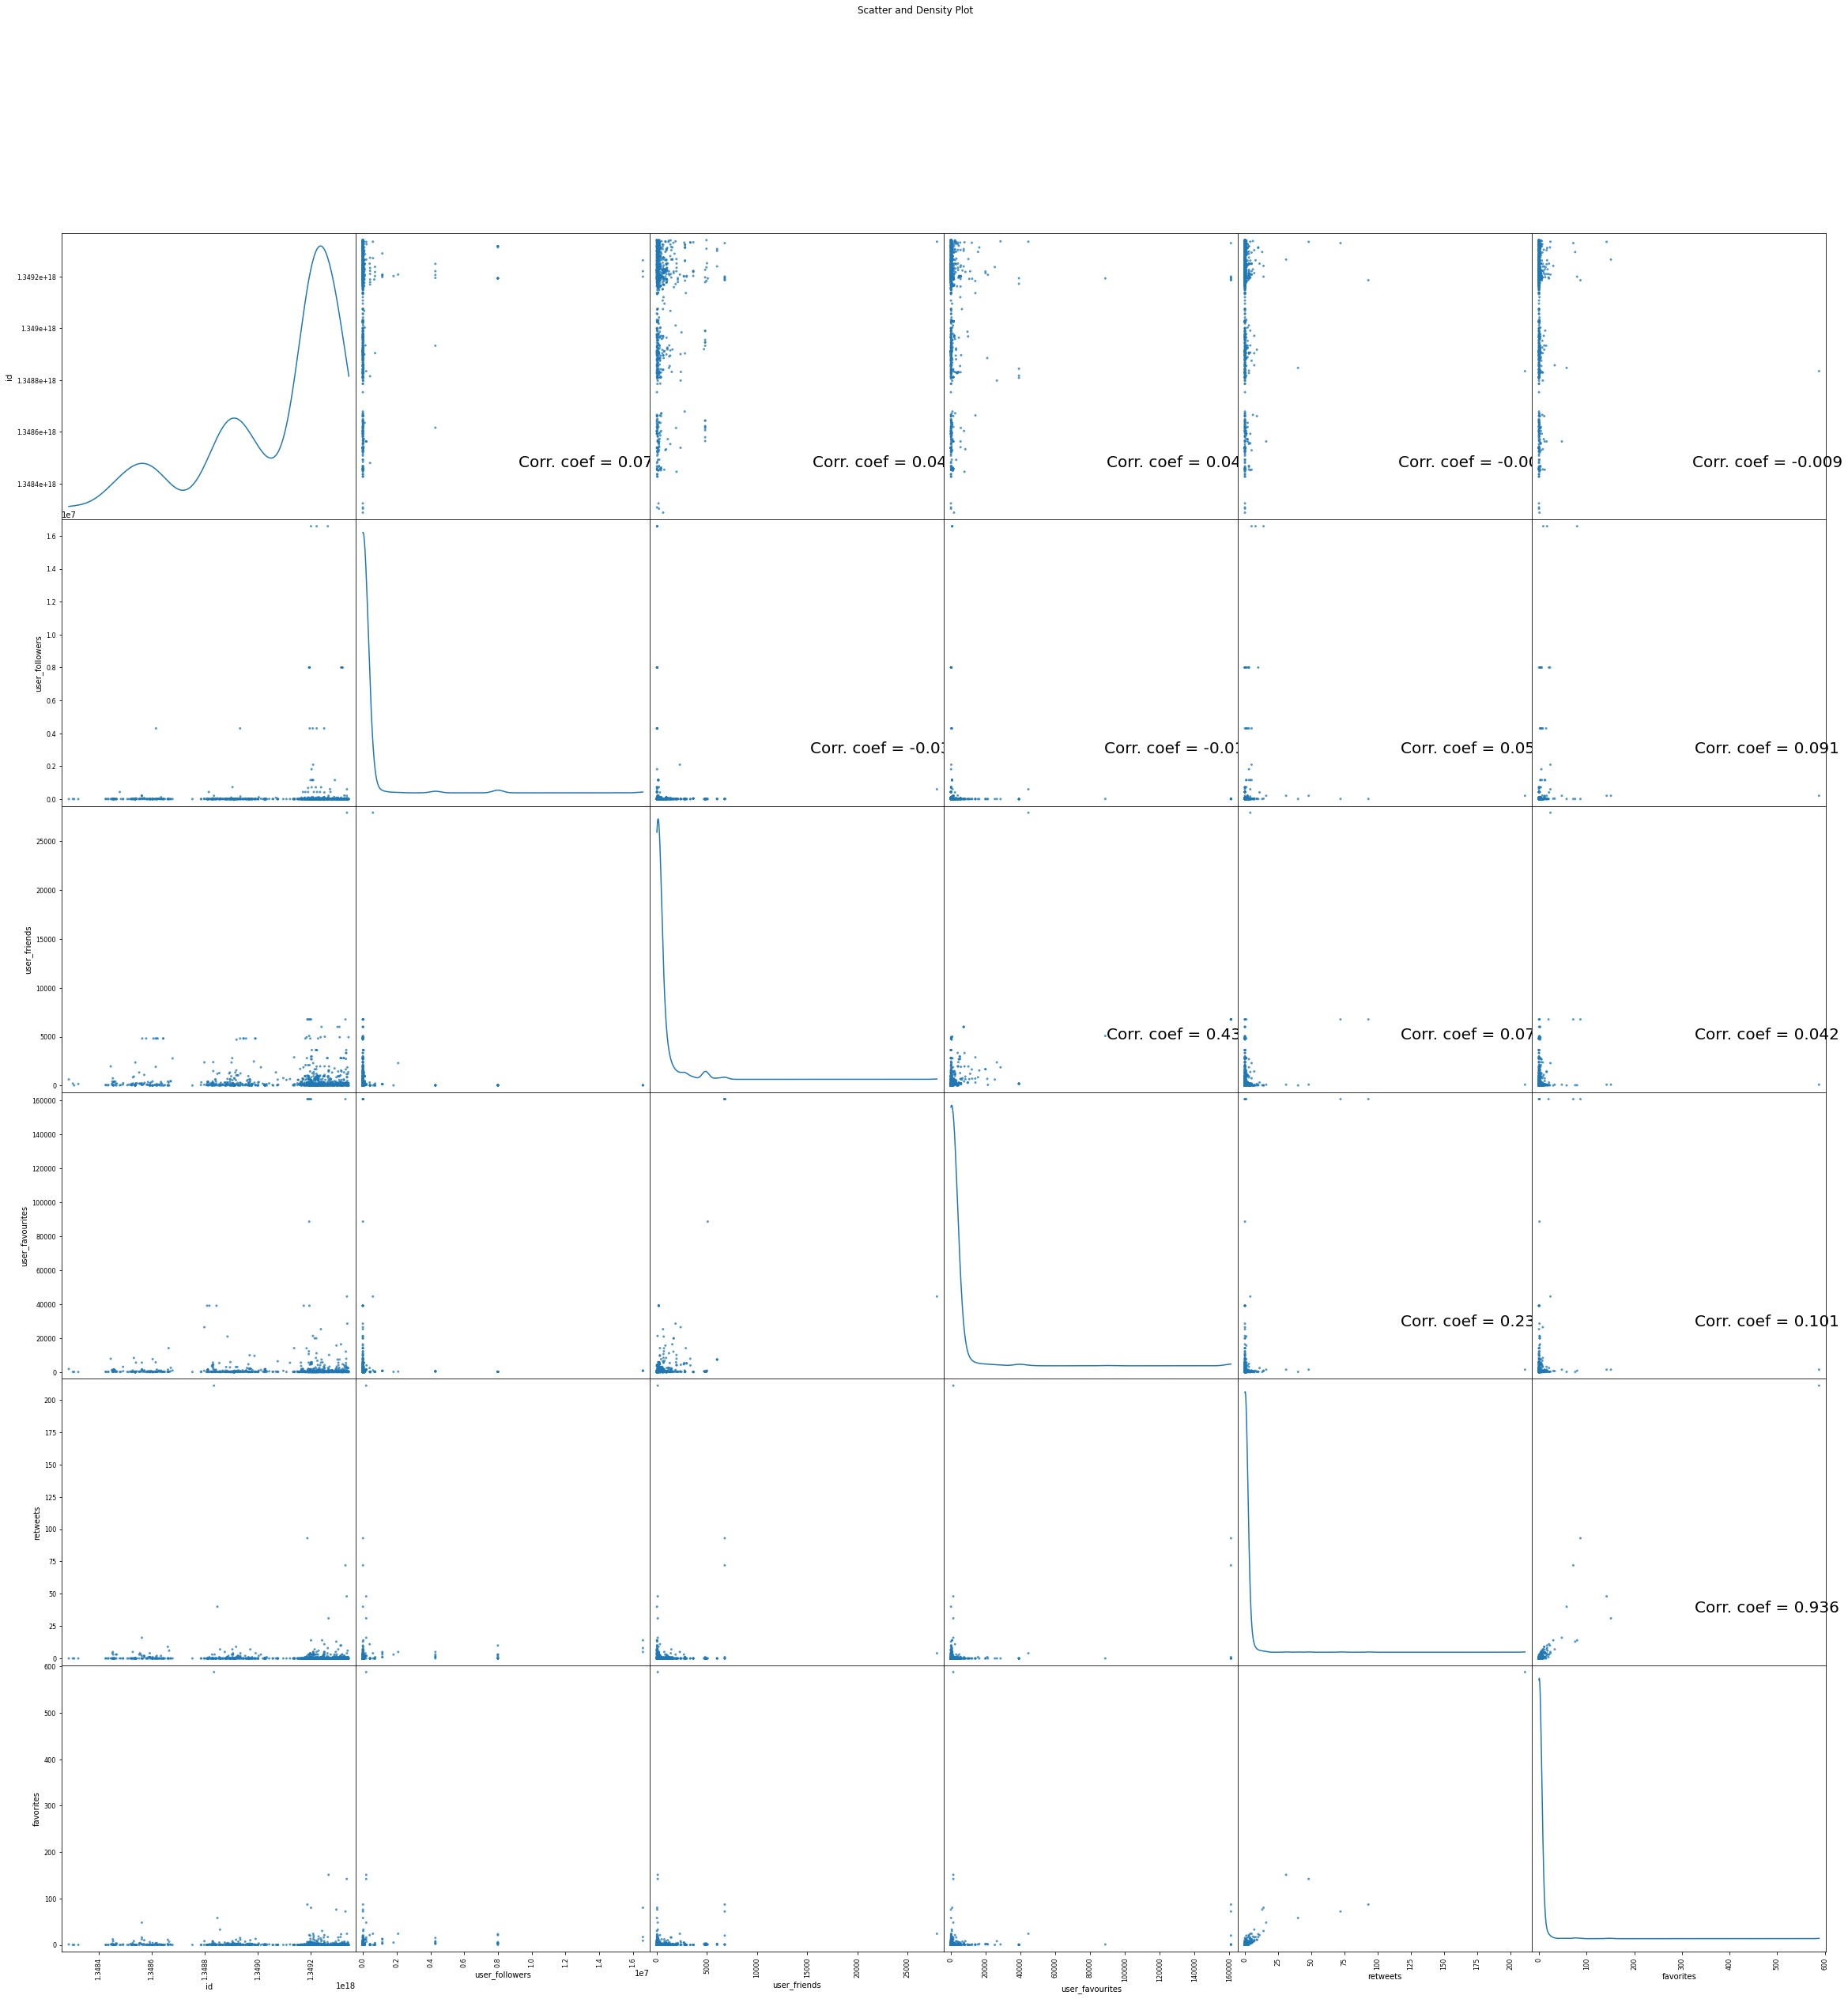

In [10]:
plotScatterMatrix(df1, 40, 20)